Olimpia Helena García Huerta
A01708462
M1. Actividad 

In [58]:
# Importamos las clases que se requieren para manejar los agentes (Agent) y su entorno (Model).
# Cada modelo puede contener múltiples agentes.
from mesa import Agent, Model

from mesa.space import MultiGrid

# Con ''RandomActivation'', hacemos que todos los agentes se activen ''al mismo tiempo''.
from mesa.time import RandomActivation

# Haremos uso de ''DataCollector'' para obtener información de cada paso de la simulación.
from mesa.datacollection import DataCollector

# matplotlib lo usaremos crear una animación de cada uno de los pasos del modelo.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Importamos los siguientes paquetes para el mejor manejo de valores numéricos.
import numpy as np
import pandas as pd

# Importamos la libreria para generar numeros aleatorios
import random

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time as tm
import datetime

In [59]:
## Definición del agente
class VacumAgent(Agent):
  def __init__(self, id, model):
    super().__init__(id,model)
    ##self.position = (x,y)

  ## Función para limpiar la celda
  def vacum(self):
    self.model.clean_cell(self.pos)
    self.model.cleaned += 1 

  ##Movimiento del agente
  def move(self):
    if self.model.is_dirty(self.pos):
      self.vacum()
      ## el agente elije una dirección aleatoria para moverse (unas de 
      # las 8 celdas vecinas) y elije la acción de movimiento (si no 
      # puede moverse allí, permanecerá en la misma celda).
    else:
      possible_moves = self.model.grid.get_neighborhood(self.pos, 
                                                        moore = True, 
                                                        include_center = False)
      new_position = random.choice(possible_moves)
      self.model.grid.move_agent(self, new_position)


  ## establece que va a hacer el agente cada ciclo,
  def step(self):
    self.move()


In [28]:
##aqui se llena la matriz de ceros y unos
def get_grid(model):
  grid = np.zeros( (model.grid.width, model.grid.height))
  for (x, y) in model.dirty_cells:
    grid[x][y] = 1
  
  for (content, (x,y)) in model.grid.coord_iter():
    if content == None:
      grid[x][y] = 0

  return grid

In [29]:
##genera el modelo de la simulaión
class VacumModel(Model):
    def __init__(self, width, height, vacums, dirty_cells_p):
        self.schedule = RandomActivation(self)
        self.grid = MultiGrid(width, height, torus = False)
        self.datacollector = DataCollector(model_reporters = {"Grid" : get_grid})

        ##crea las celdas sucias
        dirty_cells = int(dirty_cells_p * width * height)
        self.dirty_cells = set(random.sample([(x,y) for x in range(width) for y in range(height)], dirty_cells))
        self.cleaned = 0

        ##posiciona los agentes
        for i in range (vacums):
            agent = VacumAgent(i, self)
            self.schedule.add(agent)
            self.grid.place_agent(agent, (0, 0))

    ##checa si la celda esta sucia
    def is_dirty(self, pos: tuple) -> bool:
        if pos in self.dirty_cells:
            return True
        else:
            return False


    ##Contador de celdas sucias
    def count_dirty(self):
        return len(self.dirty_cells)
    
    ##limpia la celda
    def clean_cell(self, pos):
        self.dirty_cells.discard(pos)

    ## steps de la simulación
    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()
        

Escenario 1:
Agentes: 1
Celdas sucias: 90%
Iteraciones: 100

In [30]:
##constantes:
WIDTH = 100
HEIGHT = 100
VACUMS = 1
ITERATIONS = 100
DIRTY_CELLS_PERCENT = 0.90

##Conntador del tiempo
start_time = tm.time()

##crea el modelo
escenario1 = VacumModel(WIDTH, HEIGHT, VACUMS, DIRTY_CELLS_PERCENT)

##recorrer el modelo
for i in range (ITERATIONS):
    escenario1.step()

##finalizar contador
end_time = tm.time()

##tiempo de ejecución
execution_time = float(end_time - start_time)

##imprime el tiempo de ejecución
print("Tiempo de ejecución: ", f"{execution_time:.2f}", "segundos")

##imprime el número de celdas limpias
print("Celdas limpias: ", escenario1.cleaned)

##calclula el porcentaje de celdas sucias
final_dirty = escenario1.count_dirty() / (WIDTH * HEIGHT) * 100  

##imprime el porcentaje de celdas sucias
print(f"Celdas sucias: {final_dirty:.2f}%\n")

Tiempo de ejecución:  0.68 segundos
Celdas limpias:  33
Celdas sucias: 89.67%



Escenario 1.1:
Agentes: 1
Celdas sucias: 90%
Iteraciones: 1000

In [31]:
##constantes:
WIDTH = 100
HEIGHT = 100
VACUMS = 1
ITERATIONS = 1000
DIRTY_CELLS_PERCENT = 0.90

##Conntador del tiempo
start_time = tm.time()

##crea el modelo
escenario11 = VacumModel(WIDTH, HEIGHT, VACUMS, DIRTY_CELLS_PERCENT)

##recorrer el modelo
for i in range (ITERATIONS):
    escenario11.step()

##finalizar contador
end_time = tm.time()

##tiempo de ejecución
execution_time = float(end_time - start_time)

##imprime el tiempo de ejecución

print("Tiempo de ejecución: ", f"{execution_time:.2f}", "segundos")

##imprime el número de celdas limpias
print("Celdas limpias: ", escenario11.cleaned)

##calclula el porcentaje de celdas sucias
final_dirty = escenario11.count_dirty() / (WIDTH * HEIGHT) * 100  

##imprime el porcentaje de celdas sucias
print(f"Celdas sucias: {final_dirty:.2f}%\n")

Tiempo de ejecución:  6.65 segundos
Celdas limpias:  209
Celdas sucias: 87.91%



Escenario 1.2:
Agentes: 1
Celdas sucias: 90%
Iteraciones: 10000

In [32]:
##constantes:
WIDTH = 100
HEIGHT = 100
VACUMS = 1
ITERATIONS = 10000
DIRTY_CELLS_PERCENT = 0.90

##Conntador del tiempo
start_time = tm.time()

##crea el modelo
escenario12 = VacumModel(WIDTH, HEIGHT, VACUMS, DIRTY_CELLS_PERCENT)

##recorrer el modelo
for i in range (ITERATIONS):
    escenario12.step()

##finalizar contador
end_time = tm.time()

##tiempo de ejecución
execution_time = float(end_time - start_time)

##imprime el tiempo de ejecución

print("Tiempo de ejecución: ", f"{execution_time:.2f}", "segundos")

##imprime el número de celdas limpias
print("Celdas limpias: ", escenario12.cleaned)

##calclula el porcentaje de celdas sucias
final_dirty = escenario12.count_dirty() / (WIDTH * HEIGHT) * 100  

##imprime el porcentaje de celdas sucias
print(f"Celdas sucias: {final_dirty:.2f}%\n")

Tiempo de ejecución:  55.56 segundos
Celdas limpias:  2027
Celdas sucias: 69.73%



Escenario 2:
Agentes: 2
Celdas sucias: 90%
Iteraciones: 100

In [33]:
##constantes:
WIDTH = 100
HEIGHT = 100
VACUMS = 2
ITERATIONS = 100
DIRTY_CELLS_PERCENT = 0.90

##Conntador del tiempo
start_time = tm.time()

##crea el modelo
escenario2 = VacumModel(WIDTH, HEIGHT, VACUMS, DIRTY_CELLS_PERCENT)

##recorrer el modelo
for i in range (ITERATIONS):
    escenario2.step()

##finalizar contador
end_time = tm.time()

##tiempo de ejecución
execution_time = float(end_time - start_time)

##imprime el tiempo de ejecución

print("Tiempo de ejecución: ", f"{execution_time:.2f}", "segundos")

##imprime el número de celdas limpias
print("Celdas limpias: ", escenario2.cleaned)

##calclula el porcentaje de celdas sucias
final_dirty = escenario2.count_dirty() / (WIDTH * HEIGHT) * 100  

##imprime el porcentaje de celdas sucias
print(f"Celdas sucias: {final_dirty:.2f}%\n")

Tiempo de ejecución:  0.79 segundos
Celdas limpias:  35
Celdas sucias: 89.65%



Escenario 2.1:
Agentes: 2
Celdas sucias: 90%
Iteraciones: 1000

In [34]:
##constantes:
WIDTH = 100
HEIGHT = 100
VACUMS = 2
ITERATIONS = 1000
DIRTY_CELLS_PERCENT = 0.90

##Conntador del tiempo
start_time = tm.time()

##crea el modelo
escenario21 = VacumModel(WIDTH, HEIGHT, VACUMS, DIRTY_CELLS_PERCENT)

##recorrer el modelo
for i in range (ITERATIONS):
    escenario21.step()

##finalizar contador
end_time = tm.time()

##tiempo de ejecución
execution_time = float(end_time - start_time)

##imprime el tiempo de ejecución

print("Tiempo de ejecución: ", f"{execution_time:.2f}", "segundos")

##imprime el número de celdas limpias
print("Celdas limpias: ", escenario21.cleaned)

##calclula el porcentaje de celdas sucias
final_dirty = escenario21.count_dirty() / (WIDTH * HEIGHT) * 100  

##imprime el porcentaje de celdas sucias
print(f"Celdas sucias: {final_dirty:.2f}%\n")

Tiempo de ejecución:  6.54 segundos
Celdas limpias:  362
Celdas sucias: 86.38%



Escenario 2.2:
Agentes: 2
Celdas sucias: 90%
Iteraciones: 10000

In [35]:
##constantes:
WIDTH = 100
HEIGHT = 100
VACUMS = 2
ITERATIONS = 10000
DIRTY_CELLS_PERCENT = 0.90

##Conntador del tiempo
start_time = tm.time()

##crea el modelo
escenario22 = VacumModel(WIDTH, HEIGHT, VACUMS, DIRTY_CELLS_PERCENT)

##recorrer el modelo
for i in range (ITERATIONS):
    escenario22.step()

##finalizar contador
end_time = tm.time()

##tiempo de ejecución
execution_time = float(end_time - start_time)

##imprime el tiempo de ejecución

print("Tiempo de ejecución: ", f"{execution_time:.2f}", "segundos")

##imprime el número de celdas limpias
print("Celdas limpias: ", escenario22.cleaned)

##calclula el porcentaje de celdas sucias
final_dirty = escenario22.count_dirty() / (WIDTH * HEIGHT) * 100  

##imprime el porcentaje de celdas sucias
print(f"Celdas sucias: {final_dirty:.2f}%\n")

Tiempo de ejecución:  55.73 segundos
Celdas limpias:  4399
Celdas sucias: 46.01%



Escenario 3:
Limpiar todo el espacio con una sola aspiradora

In [36]:
##constantes:
WIDTH = 50
HEIGHT = 50
VACUMS = 1
ITERATIONS = 1000000
DIRTY_CELLS_PERCENT = 0.90

##Conntador del tiempo
start_time = tm.time()

##crea el modelo
escenario3 = VacumModel(WIDTH, HEIGHT, VACUMS, DIRTY_CELLS_PERCENT)

##Contador de iteraciones
it_total = 0

##recorrer el modelo
for i in range (ITERATIONS):
    escenario3.step()
    it_total += 1
    
    if escenario3.count_dirty() == 0:
        break

    if (tm.time() - start_time) > 400:
        break

##finalizar contador
end_time = tm.time()

##tiempo de ejecución
execution_time = float(end_time - start_time)

##imprime el tiempo de ejecución

print("Tiempo de ejecución: ", f"{execution_time:.2f}", "segundos")

##Iteraciones necesarias
print("Total de iteraciones para limpiar el espacio: ", it_total)

##imprime el número de celdas sucias
print("Celdas sucias: ", escenario3.count_dirty())

Tiempo de ejecución:  60.14 segundos
Total de iteraciones para limpiar el espacio:  54014
Celdas sucias:  0


Escenario 4:
Cantidad óptima de aspiradoras que debe de tener para realizar la limpieza en el menor tiempo posible
Maximo numero de aspiradoras = 10

In [52]:
##constantes:
WIDTH = 100
HEIGHT = 100
VACUMS = [1,2,3,4,5,6,7,8,9,10]
ITERATIONS = 1000
DIRTY_CELLS_PERCENT = 0.90
TIMES = []
CELDAS_LIMPIAS = []

##crea el modelo
for i in VACUMS:
    
    print("Número de aspiradoras: ", i)

    ##Conntador del tiempo
    start_time = tm.time()
    
    escenario4 = VacumModel(WIDTH, HEIGHT, i, DIRTY_CELLS_PERCENT)

    ##recorrer el modelo
    for i in range (ITERATIONS):
        escenario4.step()

    ##finalizar contador
    end_time = tm.time()

    ##tiempo de ejecución
    execution_time = float(end_time - start_time)

    ##imprime el tiempo de ejecución

    print("Tiempo de ejecución: ", f"{execution_time:.2f}", "segundos")

    ##imprime el número de celdas limpias
    print("Celdas limpias: ", escenario4.cleaned)

    ##calclula el porcentaje de celdas sucias
    final_dirty = escenario4.count_dirty() / (WIDTH * HEIGHT) * 100  

    ##imprime el porcentaje de celdas sucias
    print(f"Celdas sucias: {final_dirty:.2f}%\n")

    ##Celdas totales limpias:
    clean = escenario4.cleaned + (WIDTH * HEIGHT) * (0.10)

    
    TIMES.append(execution_time) 
    CELDAS_LIMPIAS.append(clean)


Número de aspiradoras:  1
Tiempo de ejecución:  6.46 segundos
Celdas limpias:  252
Celdas sucias: 87.48%

Número de aspiradoras:  2
Tiempo de ejecución:  10.32 segundos
Celdas limpias:  338
Celdas sucias: 86.62%

Número de aspiradoras:  3
Tiempo de ejecución:  17.20 segundos
Celdas limpias:  656
Celdas sucias: 83.44%

Número de aspiradoras:  4
Tiempo de ejecución:  17.33 segundos
Celdas limpias:  539
Celdas sucias: 84.61%

Número de aspiradoras:  5
Tiempo de ejecución:  10.78 segundos
Celdas limpias:  858
Celdas sucias: 81.42%

Número de aspiradoras:  6
Tiempo de ejecución:  6.95 segundos
Celdas limpias:  942
Celdas sucias: 80.58%

Número de aspiradoras:  7
Tiempo de ejecución:  9.03 segundos
Celdas limpias:  1169
Celdas sucias: 78.31%

Número de aspiradoras:  8
Tiempo de ejecución:  7.88 segundos
Celdas limpias:  1018
Celdas sucias: 79.82%

Número de aspiradoras:  9
Tiempo de ejecución:  7.17 segundos
Celdas limpias:  970
Celdas sucias: 80.30%

Número de aspiradoras:  10
Tiempo de eje

Grafica de Aspiradoras vs Tiempo

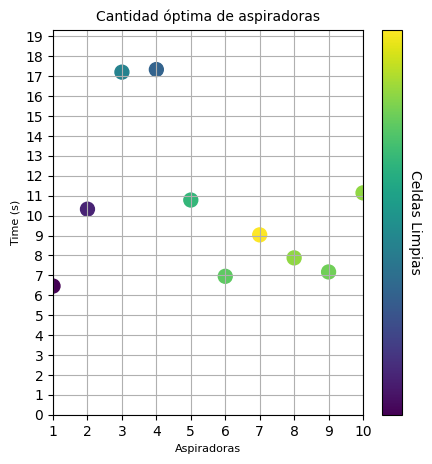

In [63]:
x = VACUMS
y = TIMES
z = CELDAS_LIMPIAS

# plot
fig, ax = plt.subplots(figsize=(5, 5))

sc = ax.scatter(x, y, c = z, cmap='viridis', s=100, vmin = min(CELDAS_LIMPIAS), vmax = max(CELDAS_LIMPIAS))

ax.set(xlim=(1, VACUMS[-1]), xticks=np.arange(1, VACUMS[-1] + 1),
       ylim=(0, max(TIMES) + 2), yticks=np.arange(0, max(TIMES) + 2, 1)),

## Agregar título
title = "Cantidad óptima de aspiradoras"
ax.set_title(title, fontsize=10)
ax.set_xlabel("Aspiradoras", fontsize=8)
ax.set_ylabel("Time (s)", fontsize=8)

## Agregar cuadrícula
ax.grid(True)

# Agregar barra de color
cbar = plt.colorbar(sc, ticks=[])
cbar.set_label('Celdas Limpias', rotation=270, labelpad=15, fontsize=10)

plt.show()